 Fifa 2022 world cup

In [4]:
import pandas as pd

fifaLink = "https://github.com/DACSS-CSSmeths/Networks_intro/raw/refs/heads/main/casesData/fifa2022.xlsx"
fifa=pd.read_excel(fifaLink,sheet_name='fifa2022')
fifa.head()


,idnum,pos,name,dob,caps,goals,club,group,nationality,age2022
0,1,GK,Hernán Galíndez,1987-03-30,12,0,Aucas,A,Ecuador,35
1,2,DF,Félix Torres,1997-01-11,17,2,Santos Laguna,A,Ecuador,25
2,3,DF,Piero Hincapié,2002-01-09,21,1,Bayer Leverkusen,A,Ecuador,20
3,4,DF,Robert Arboleda,1991-10-22,33,2,São Paulo,A,Ecuador,31
4,5,MF,José Cifuentes,1999-03-12,11,0,Los Angeles FC,A,Ecuador,23


In [5]:
fifa.loc[:,['name','club','nationality']]


,name,club,nationality
0,Hernán Galíndez,Aucas,Ecuador
1,Félix Torres,Santos Laguna,Ecuador
2,Piero Hincapié,Bayer Leverkusen,Ecuador
3,Robert Arboleda,São Paulo,Ecuador
4,José Cifuentes,Los Angeles FC,Ecuador
...,...,...,...
826,Martín Cáceres,LA Galaxy,Uruguay
827,Sergio Rochet,Nacional,Uruguay
828,Agustín Canobbio,Athletico Paranaense,Uruguay
829,Manuel Ugarte,Sporting CP,Uruguay


In [6]:
#Trying for Player_country
import networkx as nx

fifanet2 = nx.Graph()
fifanet2.add_nodes_from(fifa.name, bipartite=0) # Add the node attribute "bipartite"

fifanet2.add_nodes_from(fifa.nationality, bipartite=1) # Add the node attribute "bipartite"
fifanet2.add_edges_from([c for c in zip(fifa.name,fifa.club)])

In [7]:
from networkx.algorithms import bipartite
players_nodes,nationality_nodes = bipartite.sets(fifanet2)


AmbiguousSolution: Disconnected graph: Ambiguous solution for bipartite sets.

#Club_Country (two graphs will be created) : one where club is projected and another where country is projected


In [9]:
fifa.loc[:,['club','nationality']]


,club,nationality
0,Aucas,Ecuador
1,Santos Laguna,Ecuador
2,Bayer Leverkusen,Ecuador
3,São Paulo,Ecuador
4,Los Angeles FC,Ecuador
...,...,...
826,LA Galaxy,Uruguay
827,Nacional,Uruguay
828,Athletico Paranaense,Uruguay
829,Sporting CP,Uruguay


In [10]:
fifanet3 = nx.Graph()
fifanet3.add_nodes_from(fifa.club, bipartite=0) # Add the node attribute "bipartite"
fifanet3.add_nodes_from(fifa.nationality, bipartite=1) # Add the node attribute "bipartite"
fifanet3.add_edges_from([c for c in zip(fifa.club,fifa.nationality)])

In [11]:
clubs_nodes,nationality_nodes = bipartite.sets(fifanet3)

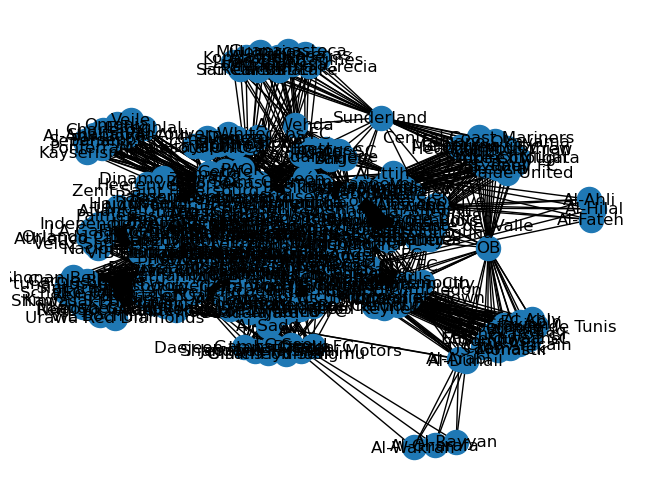

In [12]:
from networkx.algorithms import bipartite

bp_clubcountry = bipartite.weighted_projected_graph(fifanet3,clubs_nodes)

bp_clubcountry.edges.data()
nx.draw(bp_clubcountry,with_labels=True)

In [13]:
pos = nx.nx_pydot.graphviz_layout(bp_clubcountry)

nx.draw(bp_clubcountry, pos,node_color = 'pink')

# this is new
text =nx.draw_networkx_labels(bp_clubcountry, pos=pos, font_size=7)
for _, t in text.items():
    t.set_rotation(45)

FileNotFoundError: [Errno 2] "neato" not found in path.

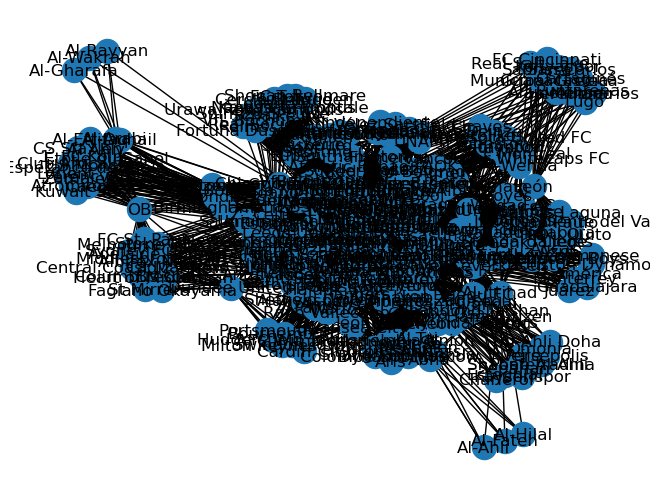

In [14]:

fifanet4 = nx.Graph()

fifanet4.add_nodes_from(fifa.nationality, bipartite=0) # Add the node attribute "bipartite"
fifanet4.add_nodes_from(fifa.club, bipartite=1) # Add the node attribute "bipartite"
fifanet4.add_edges_from([c for c in zip(fifa.nationality,fifa.club)])
##
nationality_nodes = {n for n, d in fifanet4.nodes(data=True) if d["bipartite"] == 0}
club_nodes = set(fifanet4) - nationality_nodes
##
bp_countryclub = bipartite.weighted_projected_graph(fifanet4,clubs_nodes)

bp_countryclub.edges.data()
nx.draw(bp_countryclub,with_labels=True)

In [1]:
import networkx as nx
import os
#examplesFolder="Graph/"


nx.write_graphml(bp_countryclub, "css_bP.graphml",named_key_ids=True)


##### this is wrong

# nx.write_graphml(bp_clubcountry, examplesFolder+"css_bP.graphml",named_key_ids=True)




NameError: name 'bp_countryclub' is not defined